### 1. Data Description 

In [2]:
import pandas as pd
import numpy as np 

train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#rows, cols
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
live = train.where(train['Survived']==1).mode().ix[0]
dead = train.where(train['Survived']==0).mode().ix[0]
All = train.mode().ix[0]
mod = pd.concat([live, dead, All], axis=1)
mod.columns = ["Survived_mode", "Dead_mode", "All_mode"]
mod = mod.drop(mod.index[[0,3]])
mod

,Survived_mode,Dead_mode,All_mode
Survived,1,0,0
Pclass,1,3,3
Sex,female,male,male
Age,24,21,24
SibSp,0,0,0
Parch,0,0,0
Ticket,1601,347082,1601
Fare,13,8.05,8.05
Cabin,B96 B98,C124,B96 B98
Embarked,S,S,S


In [6]:
n_cols = []
s_cols = []
for col in train.columns: 
    if train[col].dtype != 'object': 
        n_cols.append(col)
    else: 
        s_cols.append(col)
n_cols



['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
train[n_cols].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
s_cols
train[s_cols[1]].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
sex = train[s_cols[1]].value_counts()
#cabin = train[s_cols[3]].value_counts()
embarked = train[s_cols[4]].value_counts()
catval = pd.concat([sex, embarked], axis=1)
catval


,Sex,Embarked
C,NaN,168.0
Q,NaN,77.0
S,NaN,644.0
female,314.0,NaN
male,577.0,NaN


### 2. Data Processing 

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Impute missing values in Age with its median 
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())

In [12]:
#Remove outliers 
train = train.where(train['Age'] <= train['Age'].mean()+(3*train['Age'].std()))
train = train.where(train['Fare'] <= train['Fare'].mean()+(3*train['Fare'].std()))

In [13]:
train = train.dropna(how='all')
test = test.dropna(how='all')

In [14]:
#Add features 
train['family_size'] = train['SibSp'] + train['Parch']
train['Age*class'] = train['Age'] * train['Pclass']
train['FarePerPerson'] = train['Fare']/(train['family_size']+1)

test['family_size'] = test['SibSp'] + test['Parch']
test['Age*class'] = test['Age'] * test['Pclass']
test['FarePerPerson'] = test['Fare']/(test['family_size']+1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Age*class,FarePerPerson
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1.0,66.0,3.62500
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,38.0,35.64165
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0.0,78.0,7.92500
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0,35.0,26.55000
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,0.0,105.0,8.05000


### 3. Feature Engineering 

In [16]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

s = {'female': 0, 'male': 1}
train['Sex_1'] = train['Sex'].map(s)
test['Sex_1'] = test['Sex'].map(s)
d = {'C': 0, 'Q': 1, 'S': 2}
train['Embarked_1'] = train['Embarked'].map(d)
test['Embarked_1'] = test['Embarked'].map(d)




In [17]:
train = train.loc[:,['Pclass', 'Sex_1', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_1', 
                     'family_size', 'Age*class','FarePerPerson', 'Survived']]
train['Embarked_1'] = train['Embarked_1'].fillna(2)
feature = train.loc[:,['Pclass', 'Sex_1', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_1', 
                       'family_size', 'Age*class','FarePerPerson']]
target = train['Survived']


test_org = test 
test = test.loc[:,['Pclass', 'Sex_1', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_1', 'family_size', 'Age*class','FarePerPerson']]

In [18]:
#Check if there's any NaN
train[pd.isnull(train).any(axis=1)]

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,family_size,Age*class,FarePerPerson,Survived


In [19]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['FarePerPerson'] = test['FarePerPerson'].fillna(test['Fare'].median())
test[pd.isnull(test).any(axis=1)]


,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,family_size,Age*class,FarePerPerson


### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(feature, target)

print('Accuracy: {:.3f}'.format(knn.score(feature, target)))


Accuracy: 0.846


In [21]:
#prediction 
pred_knn = knn.predict(test)

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
clf = DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_split=15, 
                             max_leaf_nodes=8)
clf.fit(feature, target)
print('Accuracy: {:.3f}'.format(clf.score(feature, target)))

Accuracy: 0.840


In [23]:
# Tuning Parameters
from sklearn.grid_search import GridSearchCV
param_grid = {'max_depth': np.arange(2, 5, 1),
              'min_samples_split': np.arange(15, 41, 5), 
              'max_leaf_nodes': np.arange(5, 11, 1)}
reg = GridSearchCV(DecisionTreeClassifier(), param_grid)
reg.fit(feature, target)
print(reg.best_params_, reg.best_score_)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'min_samples_split': 25, 'max_depth': 3, 'max_leaf_nodes': 8} 0.8171296296296297


In [24]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', class_names=['dead', 'survived'], 
                feature_names=feature.columns, impurity=False, filled=True)


In [25]:
!dot -Tpng tree.dot -o tree.png

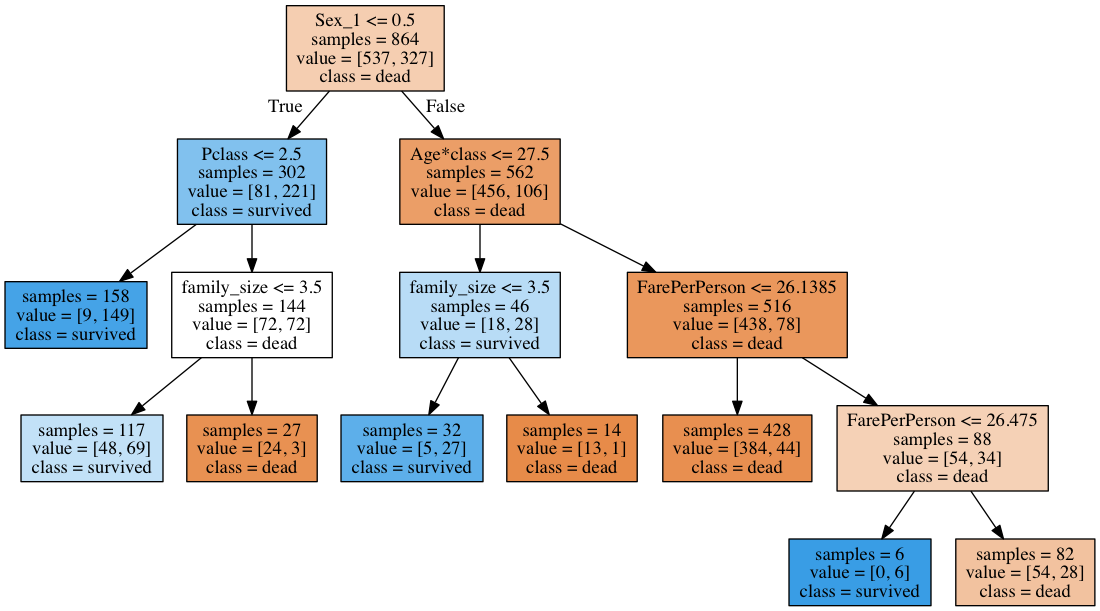

In [26]:
from IPython.display import Image
Image(filename="tree.png")

In [27]:
importances = clf.feature_importances_
col = feature.columns 
#featureimp = dict(zip(col, importances))
sorted(zip(col, importances), key=lambda pair: pair[1])

[('Age', 0.0),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Fare', 0.0),
 ('Embarked_1', 0.0),
 ('FarePerPerson', 0.082347719335030975),
 ('Age*class', 0.087785355125495471),
 ('family_size', 0.10757932740137556),
 ('Pclass', 0.1468252709461757),
 ('Sex_1', 0.57546232719192225)]

In [28]:
#prediction 
pred_tree = clf.predict(test)

#### Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3,
                                max_leaf_nodes=9, min_samples_split=20,n_jobs=-1)
#n_jobs=-1: use all CPU to run -> faster 
forest.fit(feature, target)
print(forest.score(feature, target))


0.815972222222


In [30]:
param_grid = {'n_estimators': np.arange(7, 15, 1),
              'max_depth': np.arange(2, 5, 1),
              'min_samples_split': np.arange(15, 41, 5), 
              'max_leaf_nodes': np.arange(5, 11, 1)}
reg = GridSearchCV(RandomForestClassifier(), param_grid)
reg.fit(feature, target)
print(reg.best_params_, reg.best_score_)

{'n_estimators': 11, 'min_samples_split': 20, 'max_depth': 4, 'max_leaf_nodes': 8} 0.8240740740740741


In [31]:
#prediction 
pred_forest = forest.predict(test)

#### Gradient Boosting 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators= 120, max_depth=4, learning_rate=0.02, 
                                  random_state=0)
gbrt.fit(feature, target)

print("Accuracy: {:.3f}".format(gbrt.score(feature, target)))

Accuracy: 0.877


In [33]:
#prediction 
pred_gbrt = gbrt.predict(test)

###### I tried SVC 3 kernels but the accuracy of the prediction did not get improved.  

In [34]:
# from sklearn.svm import SVC
# lin_svc = SVC(kernel='linear', probability=True)
# lin_svc.fit(X_train, y_train)
# print("Linear SVC accuracy on training set: {:.3f}".format(lin_svc.score(X_train, y_train)))
# print("Linear SVC accuracy on test set: {:.3f}".format(lin_svc.score(X_test, y_test)))

# rbf_svc = SVC(kernel='rbf', C=6, gamma=0.1, probability=True)
# rbf_svc.fit(X_train, y_train)
# print("rbf SVC accuracy on training set: {:.3f}".format(rbf_svc.score(X_train, y_train)))
# print("rbf SVC accuracy on test set: {:.3f}".format(rbf_svc.score(X_test, y_test)))


# # poly_svc = SVC(kernel='poly').fit(X_train, y_train)
# # print("Poly SVC accuracy on training set: {:.3f}".format(poly_svc.score(X_train, y_train)))
# # print("Poly SVC accuracy on test set: {:.3f}".format(poly_svc.score(X_test, y_test)))



In [35]:
# param_grid = {'C': np.arange(1, 100, 5),
#               'gamma': np.arange(0.1, 10, 0.1),
#               }
# reg = GridSearchCV(SVC(kernel='rbf'), param_grid)
# reg.fit(X_train, y_train)
# print(reg.best_params_, reg.best_score_)

In [36]:
#VotingClassifier 
from sklearn.ensemble import VotingClassifier

eclf2 = VotingClassifier(estimators=[
        ('tree', clf), ('forest', forest), ('gbrt', gbrt)], 
                        voting='soft')

eclf2 = eclf2.fit(feature, target)
print("Accuracy: {:.3f}".format(eclf2.score(feature, target)))

eclf3 = VotingClassifier(estimators=[
        ('tree', clf), ('forest', forest), ('gbrt', gbrt)], 
                        voting='soft', weights=[1,1,2])

eclf3 = eclf3.fit(feature, target)
print("Accuracy: {:.3f}".format(eclf3.score(feature, target)))


eclf4 = VotingClassifier(
    estimators=[('tree', clf), ('forest', forest), ('gbrt', gbrt), ('knn', knn)],
    voting='soft', 
    weights=[1,1,2,1]
)

eclf4 = eclf4.fit(feature, target)
print("Accuracy: {:.3f}".format(eclf4.score(feature, target)))

Accuracy: 0.859
Accuracy: 0.866
Accuracy: 0.894


The estimator composed of decision tree, random forest, gradient boosting and knn with more weight on gradient boosting produces the highest accuracy (0.894). 

In [220]:
#prediction 
pred3 = pd.DataFrame()
eclf4 = eclf4.predict(test)
pred3['pred_eclf4'] = eclf4.tolist()
pred3['Survived'] = pred3['pred_eclf4'].astype(int)

In [ ]:
#Submission to Kaggle in csv file 
submission4 = pd.concat([test_org['PassengerId'], pred3['Survived']], axis=1)
submission4.to_csv('titanic_sub_addfeat.csv', index=False)